In [227]:
#------------------------------------Statistics Training Day 3-------------------------------------------
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [228]:
data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)

In [229]:
#From Day 2:

bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1]

counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
dmax = np.max(bins1); dmin =np.min(bins1)
binwidth = np.float(dmax-dmin)/100



N_tot = np.float(len(counts))
sigma = np.sqrt(counts)/N_tot/binwidth ; #print sigma 
dPddist = counts/N_tot/binwidth
counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
counts_one_hundred = counts/binwidth

y = np.sqrt(bins1)*np.exp((-1.0*bins1/150))
normalized_y = y/(np.sum(y)*binwidth)



chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print "chi squared:", chisq
P_Value = 1 - stats.chi2.cdf(chisq,100); print "p-value:", P_Value 
#Input for stats.chi2.cdf(chisq , d.o.f.)


chi squared: 664.270156629
p-value: 0.0


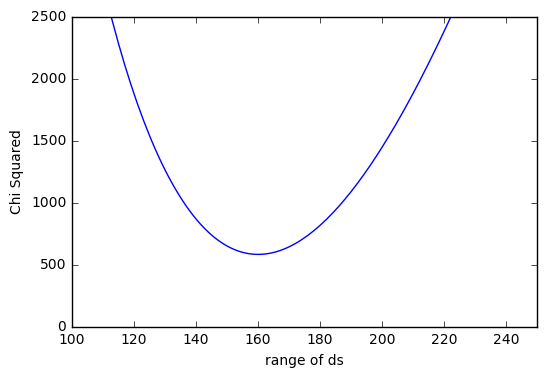

minimum chi squared value: 581.480881788
best ds for fit: 160.06402561


In [230]:
#--------------------------------------Day 3---------------------------------------------------
#Let's tackle a better fit for the hipparchos data
#To do this, let's write a for loop that will construct a new fit, Y, and calculate chi sq. for
#each iteration:
ds = np.linspace(0,2500,2500)

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1] #to match dimensions as ChiSq 
#print len(ChiSq), len(ds)

plt.plot(ds,ChiSq)
plt.xlabel('range of ds')
plt.ylabel('Chi Squared')
plt.ylim(0,2500)
plt.xlim(100,250)
plt.show()

print "minimum chi squared value:",np.min(ChiSq)
print "best ds for fit:",ds[np.argmin(ChiSq)]

In [231]:
#Even with the best ds value, Y is a terrible fit. The smaller Chi squared is, the better.

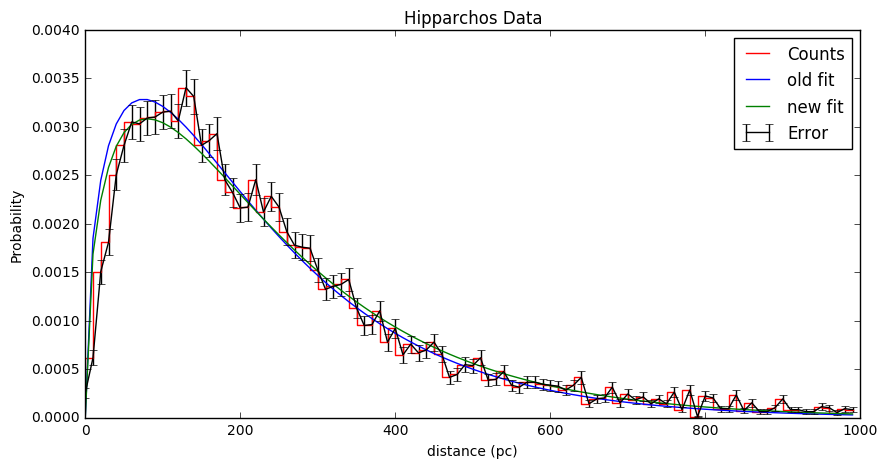

Reduced Chi Squared for Fit 1: 5.87354426049


In [232]:
ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)
                              
#Try out ds_min in a plot:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'old fit')
ax.plot(bins1,norm_Y, color = 'green', label = 'new fit')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'black', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()

DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq

In [233]:
#Let's change Y again to improve chi squared: Y = (x^p)* e^(-x/ds)

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size)); 

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2))
        
print "Minimum Chi Squared value for new model:", np.min(ChiSq2)

Minimum Chi Squared value for new model: 339.110574505


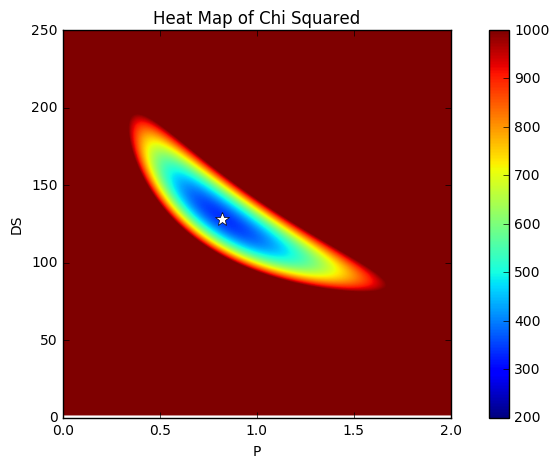

Minimum Chi Squared value for new model: 339.110574505
best DS value: 128.244488978
best P value: 0.821643286573


In [234]:
i,j = np.where(ChiSq2==np.min(ChiSq2))
#print i; print j

new_Y2 = (bins1**i)*np.exp((-1.0*bins1/j))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)

#plt.pcolormesh(x, y, intensity)
#plt.colorbar() #need a colorbar to show the intensity scale
#plt.show()
DS_best =DS[i[0]]; P_best=P[j[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq2,extent=([P[0],P[-1],DS[0],DS[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(P_best,DS_best, markersize=10,color='white', marker='*')
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Heat Map of Chi Squared')
plt.show()

print "Minimum Chi Squared value for new model:", np.min(ChiSq2)
print "best DS value:", DS_best; print "best P value:", P_best


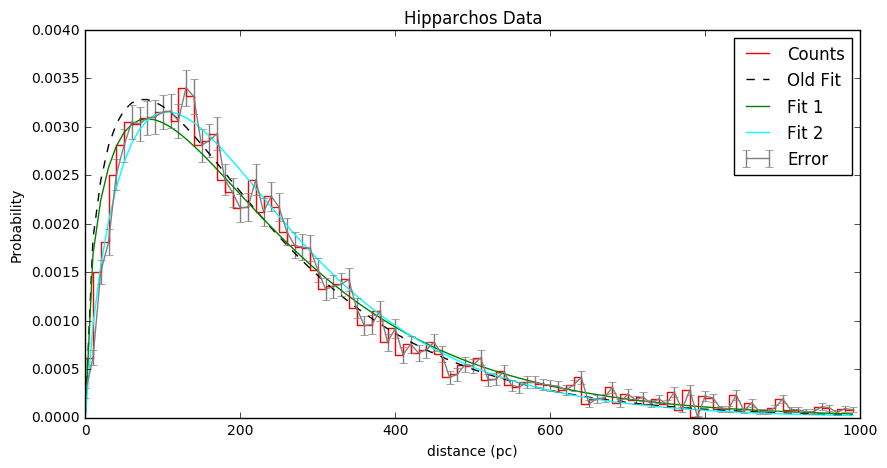

Reduced Chi Squared for Old Fit: 6.7097995619
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi squared for Fit 2: 3.46031198475


In [236]:
new_Y2 = (bins1**P_best)*np.exp((-1.0*bins1/DS_best))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'grey', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()

DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit
Reduced_ChiSq0 =np.min(chisq)/ DOF; print "Reduced Chi Squared for Old Fit:", Reduced_ChiSq0
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print "Reduced Chi squared for Fit 2:", Reduced_ChiSq2